<a href="https://colab.research.google.com/github/gferew1/IntroML/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
from sklearn.decomposition import pca


drive.mount ('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/diabetes.csv'
file_path2 = '/content/drive/My Drive/Colab Notebooks/cancer.csv'

ds1= pd.read_csv(file_path)

#just displaying the first 11 rows
#could have also set to max to see all rows but may have been a bit to much

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Now split the dataset

Column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_data = ds1.iloc[ :, [0,1,2,3,4,5,6,7]].values

# this is target variable
Y_data= ds1.iloc[:,8].values


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [ ]:
Y_pred = classifier.predict(X_test)

confus_matrix = confusion_matrix(Y_test, Y_pred)



In [ ]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall: ", metrics.recall_score(Y_test, Y_pred))
print("F1_Score:", metrics.f1_score(Y_test, Y_pred))


Accuracy:  0.8246753246753247
Precision: 0.7631578947368421
Recall:  0.6170212765957447
F1_Score: 0.6823529411764706


<Axes: >

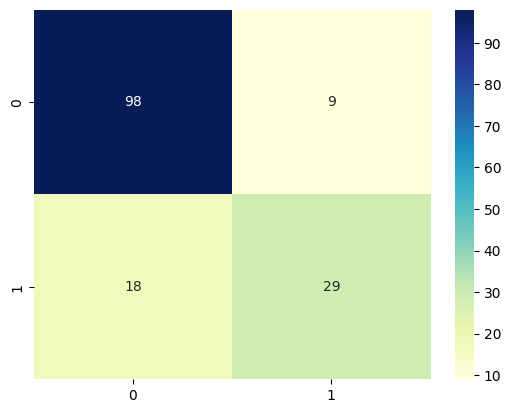

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confus_matrix), annot = True , cmap = "YlGnBu", fmt = 'g')


2A.)

In [ ]:
ds2= pd.read_csv(file_path2)

Varlist =  ['diagnosis']

def binary_map(x):
    return x.map({'M': 1, 'B': 0})

ds2[Varlist] = ds2[Varlist].apply(binary_map)

X = ds2.iloc[:, 2:32].values
Y = ds2.iloc[:, 1].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit (X_train, Y_train)


LogisticRegression(random_state=0)

In [ ]:

y_pred = classifier.predict(X_test)
confu_matrix = confusion_matrix(Y_test, y_pred)

accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

precision = metrics.precision_score(Y_test, y_pred)
print ("Precision:", precision)

recall = metrics.recall_score(Y_test, y_pred)
print ("recall:", recall)

f1_score = metrics.f1_score(Y_test, y_pred)
print ("f1_score:", f1_score)




Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
recall: 0.9574468085106383
f1_score: 0.9574468085106385


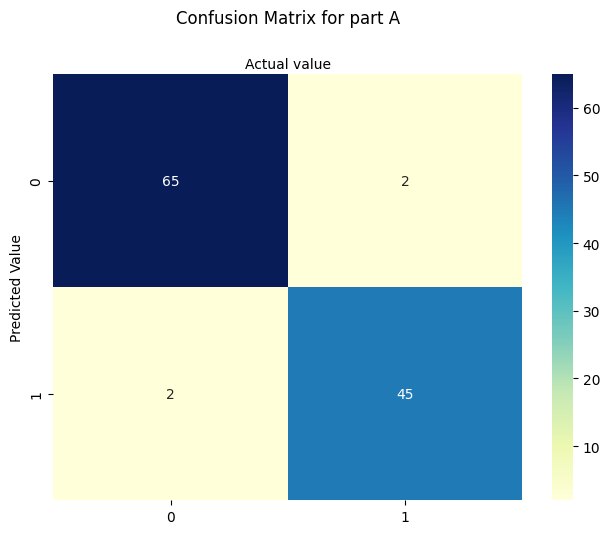

In [ ]:


class_names = [0, 1]  # Names of the classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(confu_matrix), annot=True, cmap="YlGnBu", fmt='g')

ax.xaxis.set_label_position("top")

plt.tight_layout()

plt.title('Confusion Matrix for part A', y=1.1)

plt.ylabel('Predicted Value')

plt.xlabel('Actual value')

plt.show()  # Display the heatmap




2B.)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)


predicted = model.predict(X_test)


matrix = confusion_matrix(Y_test, predicted)

report = classification_report(Y_test, predicted)
print("Classification Report:\n", report)





Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        67
           1       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



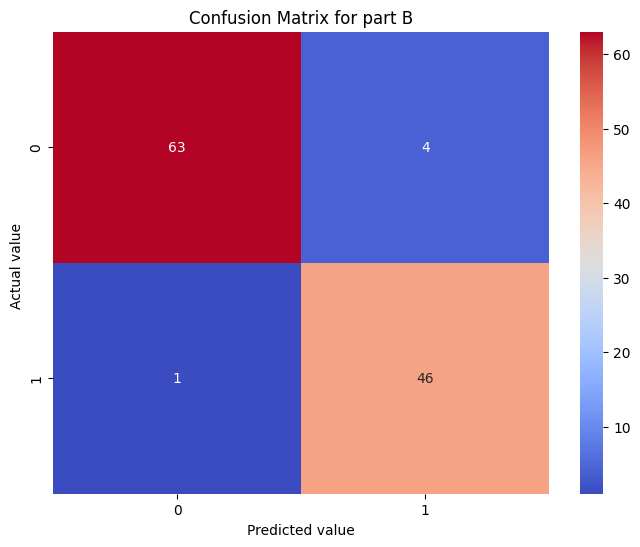

In [ ]:


class_names = [0, 1]  # Names of the classes


plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted value')
plt.ylabel('Actual value ')
plt.title('Confusion Matrix for part B')

plt.show()


problem 3

In [ ]:
model = GaussianNB()

model.fit(X,Y)

expected = Y

predicted = model.predict(X)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))




              precision    recall  f1-score   support

           0       0.94      0.97      0.95       357
           1       0.95      0.89      0.92       212

    accuracy                           0.94       569
   macro avg       0.94      0.93      0.94       569
weighted avg       0.94      0.94      0.94       569

[[347  10]
 [ 23 189]]


Problem 4

In [ ]:
pca = PCA (n_components = 2)

principalComponents = pca.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = GaussianNB()

model.fit(X_train_pca, Y_train)

predicted = model.predict(X_test_pca)

accuracy = metrics.accuracy_score(Y_test, predicted)
precision = metrics.precision_score(Y_test, predicted)
recall = metrics.recall_score(Y_test, predicted)
f1_score = metrics.f1_score(Y_test, predicted)

print("Performance with Principal Components:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")



Performance with 2 Principal Components:
Accuracy: 0.9122807017543859
Precision: 0.9743589743589743
Recall: 0.8085106382978723
F1 Score: 0.8837209302325582


Problem 5

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


model = LogisticRegression(solver='liblinear')


model.fit(X_train_pca, Y_train)


predicted = model.predict(X_test_pca)

accuracy = metrics.accuracy_score(Y_test, predicted)
precision = metrics.precision_score(Y_test, predicted)
recall = metrics.recall_score(Y_test, predicted)
f1_score = metrics.f1_score(Y_test, predicted)

print("Performance with Principal Components and Logistic Regression:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")


Performance with Principal Components and Logistic Regression:
Accuracy: 0.9473684210526315
Precision: 0.9555555555555556
Recall: 0.9148936170212766
F1 Score: 0.9347826086956522
